### Error Analysis

Now that we have a model trained and ready to go, we will use it to make predictions on our test set to see its performance. I will pick out the instances where the model has made the largest error to see what went wrong. It could also be found that the house was priced poorly making the model to be off. SHAP can help with this process as we can see what features lead to the prediction by the model. 

In [91]:
import shap
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

In [92]:
orgData = pd.read_csv('AmesHousing.csv')


In [93]:
model = xgb.Booster()
model.load_model('model_3.bin')

data = pd.read_csv('errorDF.csv')
data = data.set_index('Unnamed: 0')
data.iloc[0]

MS SubClass           60.0000
MS Zoning              5.0000
Lot Frontage           0.0000
Lot Area           24572.0000
Street                 1.0000
                     ...     
Sale Type              9.0000
Sale Condition         3.0000
SalePrice         150000.0000
prediction        336566.3000
errors            186566.3125
Name: 1182, Length: 65, dtype: float64

In [97]:
print(data.iloc[0]['Overall Qual'])
print(data.iloc[0]['SalePrice'])

9.0
150000.0


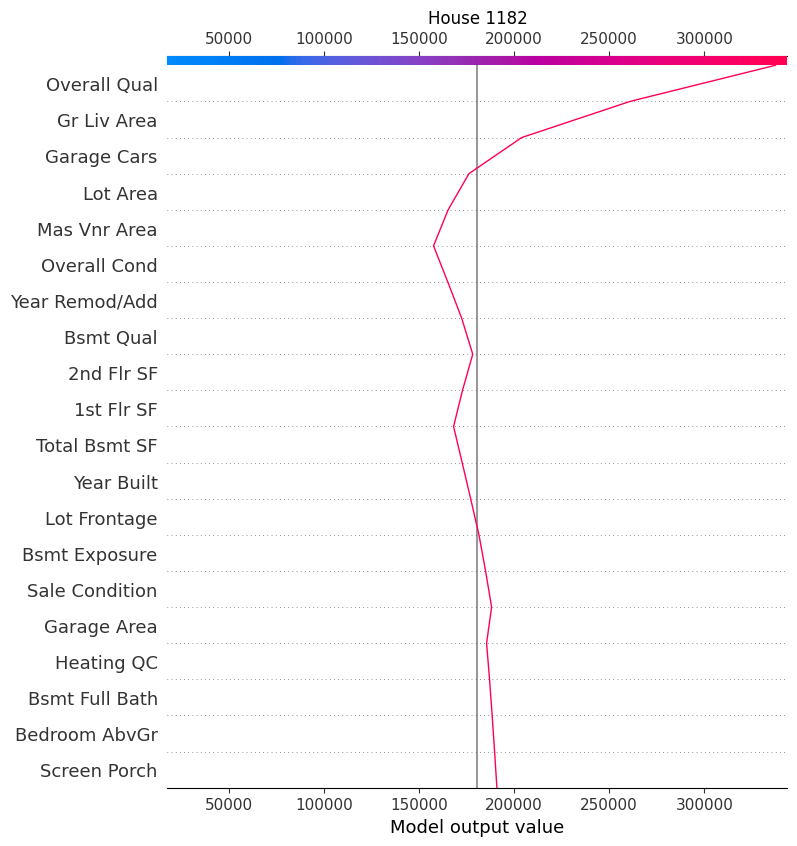

In [95]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data.iloc[:,:-3])
expected_value = explainer.expected_value

shap.decision_plot(expected_value, shap_values[0], data.columns[:-3], title = "House 1182")

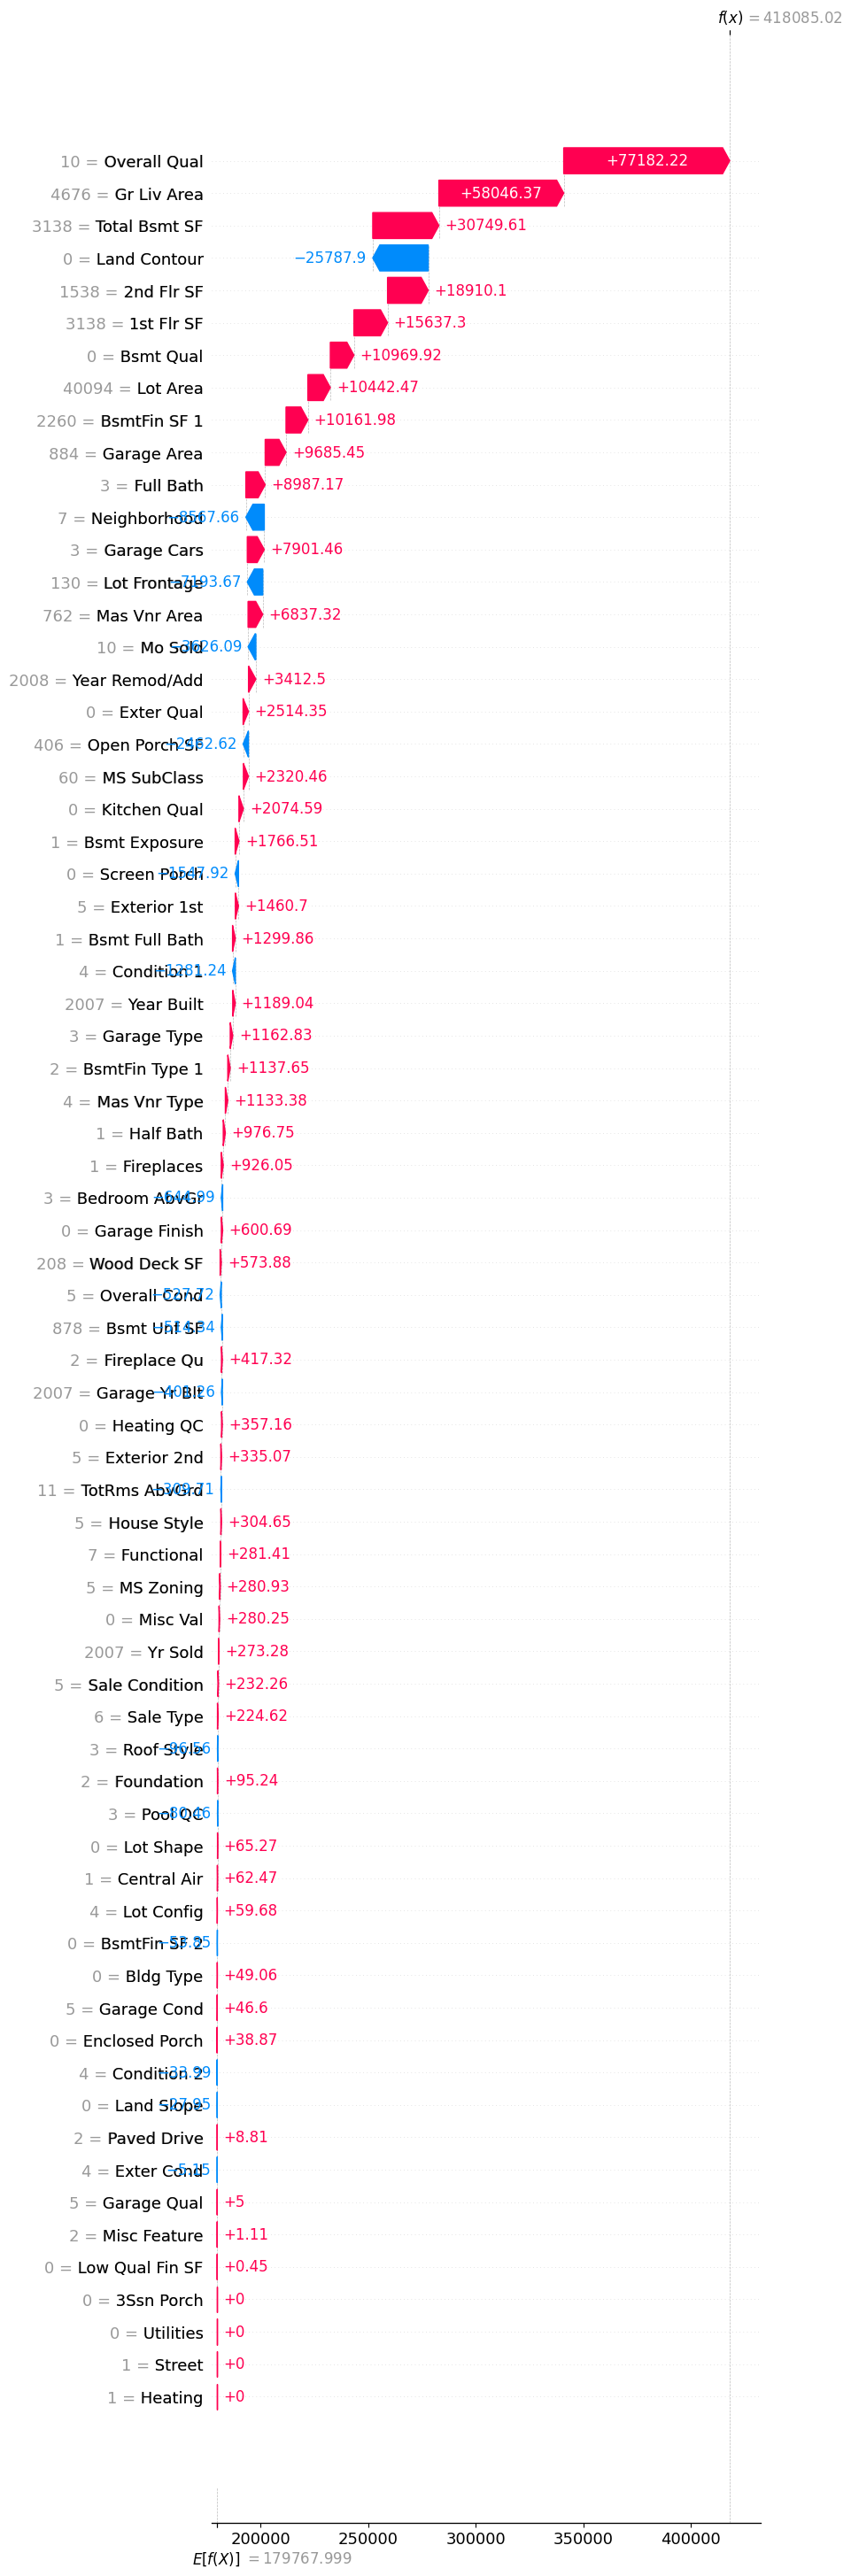

In [36]:
explainer = shap.Explainer(model, data.iloc[:,:-3])
shap_valuesb = explainer(data.iloc[:,:-3])
shap.waterfall_plot(shap_valuesb[0], max_display=70)

In [5]:
data['Gr Liv Area'].mean()

1517.2141882673943

In [37]:
orgData.iloc[2181]['Lot Frontage']

130.0

In [38]:
data.iloc[0]['Lot Frontage']

130.0

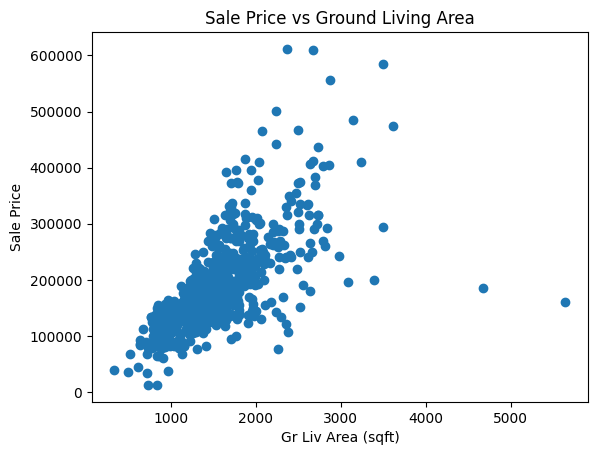

In [7]:
plt.scatter(x=data['Gr Liv Area'], y = data['SalePrice'])
plt.title("Sale Price vs Ground Living Area")
plt.ylabel("Sale Price")
plt.xlabel("Gr Liv Area (sqft)")
plt.show()


In [111]:
data.iloc[11]

MS SubClass           20.0000
MS Zoning              5.0000
Lot Frontage          49.0000
Lot Area           20896.0000
Street                 1.0000
                     ...     
Sale Type              6.0000
Sale Condition         5.0000
SalePrice         423000.0000
prediction        359011.5600
errors             63988.4375
Name: 2456, Length: 65, dtype: float64

In [108]:
orgData.iloc[1182]['Neighborhood']

'Veenker'

In [102]:
data.iloc[2]['Gr Liv Area']

1502.0

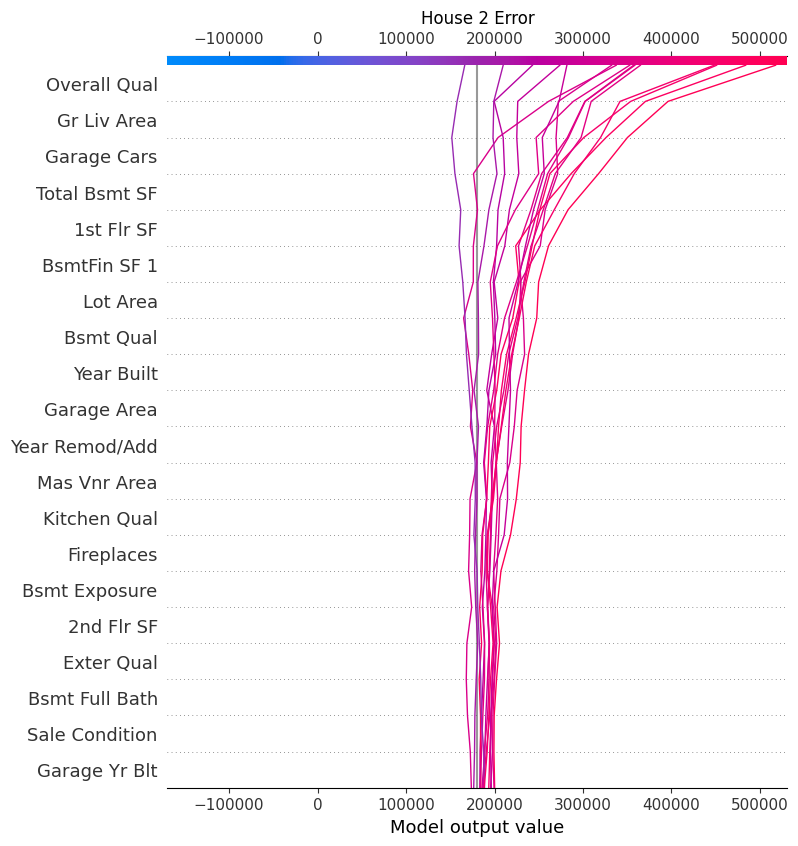

In [117]:
shap.decision_plot(expected_value, shap_values[:15], data.columns[:-3], title = "House 2 Error")